In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Generate a undirected unweighted graphs: Gba. 
Gba is a Barabasi-Albert preferential model graph with n = 1000 nodes (steps) and the number of edges to attach at each step m = 2

In [6]:
G_ba = nx.barabasi_albert_graph(1000,2)

In [7]:
print (nx.info(G_ba))

Graph with 1000 nodes and 1996 edges


In [9]:
import networkx as nx
import numpy as np
from tqdm import tqdm


def one_step_simulation(graph, beta, delta, state, rg):
    """
    Simulate one step of the SIS model.
    """
    new_state = state.copy()
    for i in range(graph.number_of_nodes()):
        if state[i] == 1:
            j = list(graph.neighbors(i))
            change = (rg.rand(len(j)) < beta).astype(int)
            new_state[j] = state[j] | change
            new_state[i] = 0 if rg.rand() < delta else 1
    return new_state


def simulate_SIS(graph, seed, beta=0.2, delta=0.2, max_time=500):
    """
    Simulate the SIS model with the given parameters.
    """
    N = max(graph.nodes()) + 1
    rg = np.random.RandomState(seed)
    # Initialize the state vector
    state = np.zeros(N, dtype=int)
    infected = graph.nodes
    for i in infected:
        state[i] = 1

    # simulate max_time steps
    states = [state]
    for i in tqdm(range(max_time)):
        state = one_step_simulation(graph, beta, delta, state, rg)
        states.append(state)
    return states


def read_edge_list(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()
    graph = nx.Graph()
    for line in lines:
        u, v = line.split()
        graph.add_edge(int(u), int(v))
    return graph


In [ ]:
sum_a = []

for iter in range(200):
  inf_node = simulate_SIS(G_ba,seed = iter)
  sum = []
  for z in range(500):
    s =0
    s +=np.count_nonzero(inf_node[z] == 1)
    sum.append(s)
  sum_a.append(sum)

In [ ]:
sum_a

In [11]:
I_mean = np.average(sum_a, axis =0)

<function matplotlib.pyplot.show(*args, **kw)>

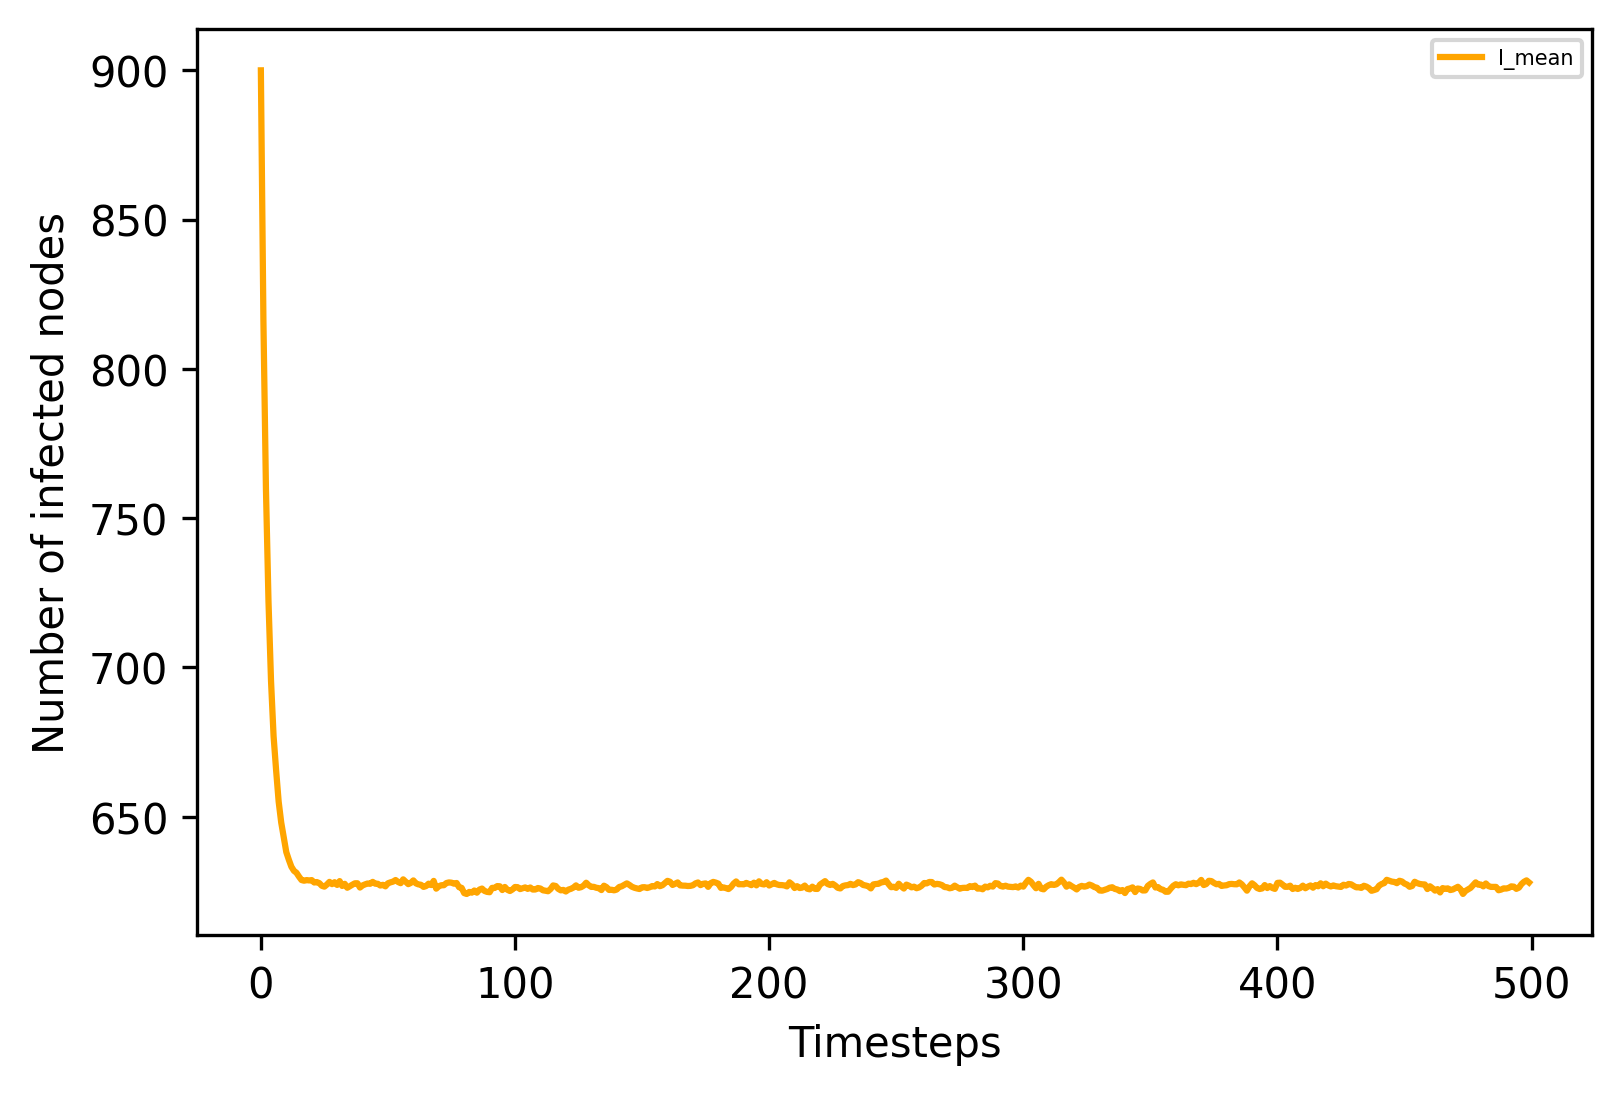

In [24]:
I_mean = np.average(sum_a, axis =0)
# plot results for S and I with time
lst = list(range(len(I_mean)))
#plt.title("Plot of S (Orange) and I (Green)")
plt.xlabel("Timesteps")
plt.ylabel("Number of infected nodes")
#plt.plot(lst, yI, color ="Orange", label = 'I_mean')
plt.plot(lst, I_mean, color ="orange", label = 'I_mean')
#plt.plot(lst, S_mean, color ="orange" , label = 'S_mean')

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300 
plt.legend(loc=1, prop={'size': 5})

plt.show

In [ ]:
sum

In [14]:
import networkx as nx
import numpy as np
from typing import List

#rng = np.random.RandomState(seed)

def sample_nodes(G, num_nodes, rng: np.random.RandomState):
    nodes = list(G.nodes)
    return rng.choice(nodes, num_nodes, replace=False)

def sample_neighbors(G: nx.Graph, num_nodes: int, rng: np.random.RandomState):
    nodes = list(G.nodes)
    rand_nodes = rng.choice(nodes, num_nodes, replace=False)
    return [rng.choice(list(G.neighbors(node))) for node in rand_nodes]


def remove_nodes_from_graph(G: nx.Graph, nodes):
    G.remove_nodes_from(nodes)
    return G


**Q1.2**

In [37]:
rn = sample_nodes(G_ba,100, np.random.RandomState(0))
rn

array([993, 859, 298, 553, 672, 971,  27, 231, 306, 706, 496, 558, 784,
       239, 578,  55, 906, 175,  14,  77,  31, 481, 310, 311, 883, 788,
        45, 103, 760,   1, 823, 710, 614, 790, 408, 736, 957, 366, 918,
       267, 230, 996, 635, 698, 251, 783, 819, 141, 316, 587, 331, 295,
       262, 432, 862, 582, 272, 270, 987, 319, 569, 643, 142, 202, 413,
       196, 264, 531, 252, 576, 738, 299, 740, 247, 926, 412, 389, 796,
       601, 654, 261, 456, 386, 982, 909, 693, 236, 501, 497, 874, 452,
       494, 923, 279, 638, 485, 568, 108, 367, 644])

In [38]:
rn = sample_neighbors(G_ba,100, np.random.RandomState(0))
np.array(rn)

array([619, 682,  33, 121,   2,  92, 356, 550, 264, 461, 144,   5, 136,
       342, 543, 389,  69, 615,   4, 245,   9, 342, 697, 678, 375,  27,
        13, 252, 545, 184,  83, 378,   7,   5, 176, 679, 630,  31, 932,
        32,  53,  53, 196,   2,   6,  26, 406,  37,  52,   5, 142, 191,
       567,   6,   0,  68, 142,   2,  11, 210,  33, 480,   0, 176, 663,
       635, 306,  54, 103,  19, 199,  12, 728, 198, 699, 302, 268,   7,
        58, 226,   7, 168, 728, 563,  76, 235,   9,  44,  29,  57, 260,
       283, 933,  93, 158, 489, 854, 407,  47, 249])

**Q1.3**

In [17]:
G_ba = nx.barabasi_albert_graph(1000,2)
rn = sample_nodes(G_ba,100, np.random.RandomState(0))

G_r_new = remove_nodes_from_graph(G_ba,rn)
print (nx.info(G_r_new))

Graph with 900 nodes and 1647 edges


In [18]:
G_ba = nx.barabasi_albert_graph(1000,2)
fr = sample_neighbors(G_ba,100, np.random.RandomState(0))

G_fr_new = remove_nodes_from_graph(G_ba,fr)
print (nx.info(G_fr_new))

Graph with 914 nodes and 1147 edges


In [19]:
sum_a0 = []
sum_a = []
sum_a2 = []

G_ba = nx.barabasi_albert_graph(1000,2)

for iter in range(50):
  inf_node = simulate_SIS(G_ba,seed = iter)
  sum0 = []
  for z in range(500):
    s0 =0
    s0 +=np.count_nonzero(inf_node[z] == 1)
    sum0.append(s0)
  sum_a0.append(sum0)

  inf_node = simulate_SIS(G_r_new,seed = iter)
  sum = []
  for z in range(500):
    s =0
    s +=np.count_nonzero(inf_node[z] == 1)
    sum.append(s)
  sum_a.append(sum)

  inf_node2 = simulate_SIS(G_fr_new,seed = iter)
  sum2 = []
  for z in range(500):
    s2 =0
    s2 +=np.count_nonzero(inf_node2[z] == 1)
    sum2.append(s2)
  sum_a2.append(sum2)
  

100%|██████████| 500/500 [00:02<00:00, 181.42it/s]


<function matplotlib.pyplot.show(*args, **kw)>

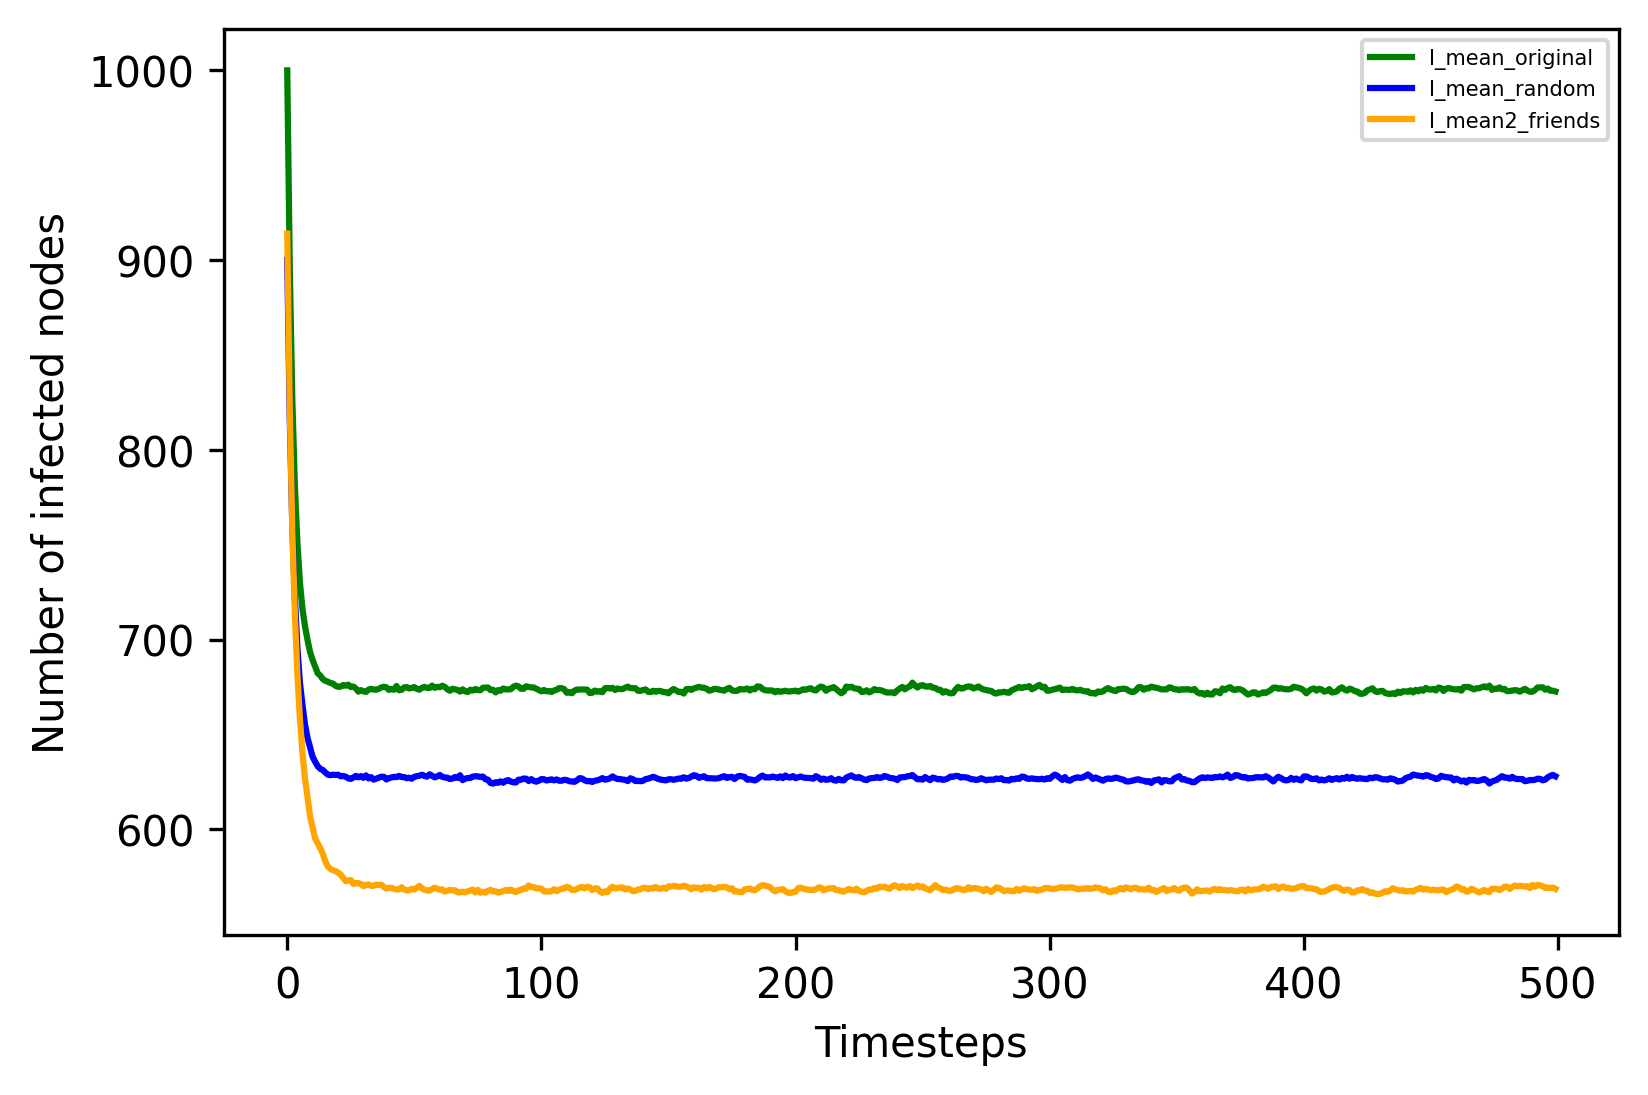

In [23]:
I_mean0 = np.average(sum_a0, axis =0)
I_mean1 = np.average(sum_a, axis =0)
I_mean2 = np.average(sum_a2, axis =0)
# plot results for S and I with time
lst = list(range(len(I_mean0)))

plt.xlabel("Timesteps")
plt.ylabel("Number of infected nodes")
#plt.plot(lst, yI, color ="green", label = 'I_mean')
plt.plot(lst, I_mean0, color ="green", label = 'I_mean_original')
plt.plot(lst, I_mean1, color ="blue", label = 'I_mean_random')
plt.plot(lst, I_mean2, color ="orange", label = 'I_mean2_friends')
#plt.plot(lst, S_mean, color ="orange" , label = 'S_mean')

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300 
plt.legend(loc=1, prop={'size': 5})

plt.show